Best Route: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Distance: 6.685240706259628


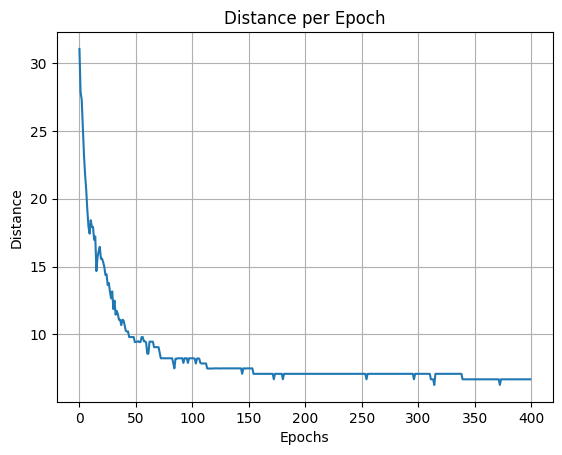

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithmTSP:
    def __init__(self, data, population_size=150, elite_size=30, mutation_rate=0.00001, generations=500):
        self.data = data
        self.population_size = population_size
        self.elite_size = elite_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.labels = range(1, len(data) + 1)
        self.values = {'points': [], 'best_path': [], 'distance': []}

    def distance(self, route):
        total_distance = 0
        for i in range(len(route)):
            from_point = self.data[route[i]]
            to_point = self.data[route[(i + 1) % len(route)]]
            total_distance += math.sqrt((to_point[0] - from_point[0]) ** 2 + (to_point[1] - from_point[1]) ** 2)
        return total_distance

    def initial_population(self):
        population = []
        for _ in range(self.population_size):
            population.append(random.sample(range(len(self.data)), len(self.data)))
        return population

    def tournament_selection(self, population, k=5):
        tournament = random.sample(population, k)
        return min(tournament, key=lambda x: self.distance(x))

    def breed(self, parent1, parent2):
        start, end = sorted(random.sample(range(len(parent1)), 2))
        gene1 = parent1[start:end]
        gene2 = [item for item in parent2 if item not in gene1]
        return gene1 + gene2

    def crossover(self, population):
        offspring = []
        for _ in range(self.population_size):
            parent1 = self.tournament_selection(population)
            parent2 = self.tournament_selection(population)
            child = self.breed(parent1, parent2)
            offspring.append(child)
        return offspring

    def mutate(self, individual):
        for swapped in range(len(individual)):
            if random.random() < self.mutation_rate:
                swap_with = int(random.random() * len(individual))
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def mutate_population(self, population):
        mutated_population = []
        for individual in population:
            mutated_population.append(self.mutate(individual))
        return mutated_population

    def evolve(self, population):
        offspring = self.crossover(population)
        mutated_offspring = self.mutate_population(offspring)
        return mutated_offspring

    def optimize(self):
        population = self.initial_population()
        for _ in range(self.generations):
            population = self.evolve(population)
            population.sort(key=lambda x: self.distance(x))
            best_path = population[0]
            self.values['points'].append(([self.data[i][0] for i in best_path], [self.data[i][1] for i in best_path]))
            self.values['best_path'].append(population[0])
            self.values['distance'].append(self.distance(best_path))

def circle_point(radius, num_data):
    data = []
    theta = 2 * math.pi / num_data
    for i in range(num_data):
        x = radius * math.cos(i * theta)
        y = radius * math.sin(i * theta)
        data.append((x, y))
    return data

def plot_route(data, route):
    x = [point[0] for point in data]
    y = [point[1] for point in data]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo')

    for i in range(len(route)):
        from_point = data[route[i]]
        to_point = data[route[(i + 1) % len(route)]]
        plt.plot([from_point[0], to_point[0]], [from_point[1], to_point[1]], 'k-')

    plt.title('Best Route')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def plot_distance_epochs(distances):
    plt.plot(range(len(distances)), distances, linestyle='-')
    plt.title('Distance per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

# Приклад використання
data = circle_point(1, 30)
ga_tsp = GeneticAlgorithmTSP(data, population_size=150, elite_size=30, mutation_rate=0.00001, generations=400)
ga_tsp.optimize()
print("Best Route:", ga_tsp.values['best_path'][-1])
print("Distance:", ga_tsp.values['distance'][-1])
#plot_route(data, ga_tsp.values['best_path'][-1])
plot_distance_epochs(ga_tsp.values['distance'])

# 30 - population_size=150, elite_size=30, mutation_rate=0.00001, generations=400)
# 50 - population_size=200, elite_size=60, mutation_rate=0.00001, generations=600)
# 100 - population_size=250, elite_size=100, mutation_rate=0.00001, generations=600)

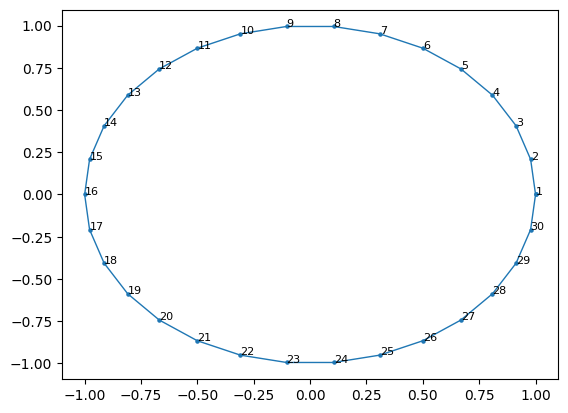

In [108]:
def graph(values, data, labels, iter):
    x = values['points'][iter][0]
    x.append(values['points'][iter][0][0])
    y = values['points'][iter][1]
    y.append(values['points'][iter][1][0])
    plt.plot(x, y, linewidth=1)
    plt.scatter(x, y, s=5)
    for i in values['best_path'][iter]:
        plt.annotate(labels[i], data[i], size=8)
    
    plt.show()


graph(ga_tsp.values, data, ga_tsp.labels, -1)

In [4]:
from plot import *

aco_plot = ACO_plot(data, ga_tsp.values, ga_tsp.labels, 'TEST', 50)
aco_plot.graph(-1)
aco_plot.animation()

d:\Projects\SwarmIntelligence\lab 4\plot.py:12: SyntaxWarning: invalid escape sequence '\G'
  Path(f'{path}\\aco\Graph').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:13: SyntaxWarning: invalid escape sequence '\A'
  Path(f'{path}\\aco\Animation').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:14: SyntaxWarning: invalid escape sequence '\D'
  Path(f'{path}\\aco\Distance').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:39: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{path}\\aco\Graph\{self.filename}.png')
d:\Projects\SwarmIntelligence\lab 4\plot.py:39: SyntaxWarning: invalid escape sequence '\G'
  plt.savefig(f'{path}\\aco\Graph\{self.filename}.png')
d:\Projects\SwarmIntelligence\lab 4\plot.py:82: SyntaxWarning: invalid escape sequence '\{'
  anim.save(f'{path}\\aco\Animation\{self.filename}.gif', dpi=120, writer='pillow')
d:\Projects\SwarmIntelligence\lab 4\plot.py:82: Synta

# ACO

In [89]:
import math
import random

class Edge:
    def __init__(self, x, y, weight, pheromone) -> None:
        self.x = x
        self.y = y
        self.weight = weight
        self.pheromone = pheromone

class Ant:
    def __init__(self, alpha, beta, len_data, edges) -> None:
        self.alpha = alpha
        self.beta = beta
        self.len_data = len_data
        self.edges = edges
        self.path = None
        self.distance = 0.0

    def _select_node(self):
        unvisited_nodes = [node for node in range(self.len_data) if node not in self.path]
        heuristic = sum([self.edges[self.path[-1]][node].weight for node in unvisited_nodes])
        roulette = sum([pow(self.edges[self.path[-1]][node].pheromone, self.alpha) * pow((heuristic / self.edges[self.path[-1]][node].weight), self.beta) for node in unvisited_nodes])
        wheel_pos = 0.0
        for node in unvisited_nodes:
            wheel_pos += pow(self.edges[self.path[-1]][node].pheromone, self.alpha) * pow((heuristic / self.edges[self.path[-1]][node].weight), self.beta)
            if wheel_pos >= random.uniform(0.0, roulette):
                return node

    def get_distance(self):
        self.distance = 0.0
        self.path = [random.randint(0, self.len_data - 1)]
        while len(self.path) < self.len_data:
            self.path.append(self._select_node())
        for i in range(self.len_data):
            self.distance += self.edges[self.path[i]][self.path[(i + 1) % self.len_data]].weight
        return self.distance
class ACO:
    def __init__(self, colony_size=10, min_scaling=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_coef=1.0, initial_pheromone=1.0, max_iter=100, data=None) -> None:
        self.colony_size = colony_size
        self.min_scaling = min_scaling
        self.rho = rho
        self.pheromone_coef = pheromone_coef
        self.max_iter = max_iter
        self.data = data
        self.len_data = len(data)
        self.labels = range(1, self.len_data + 1)
        self.edges = [[None] * self.len_data for _ in range(self.len_data)]
        for i in range(self.len_data):
            for j in range(i + 1, self.len_data):
                self.edges[i][j] = self.edges[j][i] = Edge(i, j, math.sqrt(pow(self.data[i][0] - self.data[j][0], 2.0) + pow(self.data[i][1] - self.data[j][1], 2.0)), initial_pheromone)
        self.ants = [Ant(alpha, beta, self.len_data, self.edges) for _ in range(self.colony_size)]
        self.values = {'data': [], 'best_path': [], 'distance': []}
        self.global_best_path = None
        self.global_best_distance = float('inf')

    def _add_pheromone(self, path, distance, weight=1.0):
        pheromone = self.pheromone_coef / distance
        for i in range(self.len_data):
            self.edges[path[i]][path[(i + 1) % self.len_data]].pheromone += weight * pheromone

    def max_min_method(self):
        for _ in range(self.max_iter):
            best_path = None
            best_distance = float('inf')
            for ant in self.ants:
                if ant.get_distance() < best_distance:
                    best_path = ant.path
                    best_distance = ant.distance
            if best_distance < self.global_best_distance:
                self.global_best_path = best_path
                self.global_best_distance = best_distance
            self._add_pheromone(self.global_best_path, self.global_best_distance)
            max_pheromone = self.pheromone_coef / self.global_best_distance
            min_pheromone = max_pheromone * self.min_scaling
            for i in range(self.len_data):
                for j in range(i + 1, self.len_data):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
                    if self.edges[i][j].pheromone > max_pheromone:
                        self.edges[i][j].pheromone = max_pheromone
                    elif self.edges[i][j].pheromone < min_pheromone:
                        self.edges[i][j].pheromone = min_pheromone
            self.values['data'].append(([self.data[i][0] for i in self.global_best_path], [self.data[i][1] for i in self.global_best_path]))
            self.values['best_path'].append(self.global_best_path)
            self.values['distance'].append(self.global_best_distance)

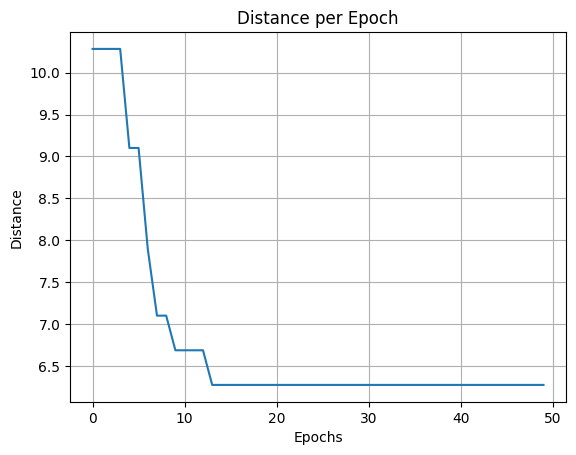

6.271707796059204


In [91]:
from create_data import *

data = circle_point(1, 30)
aco1 = ACO(colony_size=10, data=data, max_iter=50)
aco1.max_min_method()
plot_distance_epochs(aco1.values['distance'])
print(min(aco1.values['distance']))